In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Data Exploration

#### loading csv dataset into a DataFrame

In [2]:
# Download the dataset from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#2019_nCoV_data.csv
df = pd.read_csv("./2019_nCoV_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
Sno               368 non-null int64
Province/State    302 non-null object
Country           368 non-null object
Last Update       368 non-null object
Confirmed         368 non-null float64
Deaths            368 non-null float64
Recovered         368 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 20.2+ KB


#### access the column values by using the column name

In [3]:
df['Province/State']

0                Anhui
1              Beijing
2            Chongqing
3               Fujian
4                Gansu
            ...       
363    New South Wales
364           Victoria
365         Queensland
366            Bavaria
367                NaN
Name: Province/State, Length: 368, dtype: object

#### use .head() to check the first a few rows. you can specify the number of rows you want to check

In [4]:
df.head(10)

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0
5,6,Guangdong,China,1/22/2020 12:00,26.0,0.0,0.0
6,7,Guangxi,China,1/22/2020 12:00,2.0,0.0,0.0
7,8,Guizhou,China,1/22/2020 12:00,1.0,0.0,0.0
8,9,Hainan,China,1/22/2020 12:00,4.0,0.0,0.0
9,10,Hebei,China,1/22/2020 12:00,1.0,0.0,0.0


#### use .describe() to check the statistics for numeric columns

In [5]:
df.describe()

,Sno,Confirmed,Deaths,Recovered
count,368.000000,368.000000,368.000000,368.000000
mean,184.500000,68.638587,1.600543,1.290761
std,106.376689,348.146908,12.819038,7.721637
min,1.000000,0.000000,0.000000,0.000000
25%,92.750000,2.000000,0.000000,0.000000
50%,184.500000,7.000000,0.000000,0.000000
75%,276.250000,33.500000,0.000000,0.000000
max,368.000000,4586.000000,162.000000,90.000000


## Visualization

#### To get the unique values in a column, you can use the unique() functions provided by pandas and numpy

In [6]:
df['Last Update'].unique()

array(['1/22/2020 12:00', '1/23/20 12:00 PM', '1/24/2020 12:00 PM',
       '1/25/2020 10:00 PM', '1/25/2020 12:00 PM', '1/26/2020 23:00',
       '1/27/2020 20:30', '1/28/2020 23:00', '1/28/2020 18:00',
       '1/29/2020 21:00'], dtype=object)

In [7]:
np.unique(np.array(df['Last Update']), return_counts=True)

(array(['1/22/2020 12:00', '1/23/20 12:00 PM', '1/24/2020 12:00 PM',
        '1/25/2020 10:00 PM', '1/25/2020 12:00 PM', '1/26/2020 23:00',
        '1/27/2020 20:30', '1/28/2020 18:00', '1/28/2020 23:00',
        '1/29/2020 21:00'], dtype=object),
 array([37, 45, 40,  2, 41, 46, 51,  1, 50, 55]))

In [8]:
uniq_dates = list(df['Last Update'].unique())
uniq_dates

['1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 PM',
 '1/26/2020 23:00',
 '1/27/2020 20:30',
 '1/28/2020 23:00',
 '1/28/2020 18:00',
 '1/29/2020 21:00']

#### select rows that match specific conditions, you can use ()&() or ()|() to connect multiple conditions

In [9]:
df[df['Last Update']=='1/29/2020 21:00']['Confirmed'].sum()

7779.0

#### create a new DataFrame for visualization

In [10]:
confirmed=[]
recovered=[]
deaths=[]
for x in uniq_dates:
    confirmed.append(df[df['Last Update']==x]['Confirmed'].sum())
    recovered.append(df[df['Last Update']==x]['Recovered'].sum())
    deaths.append(df[df['Last Update']==x]['Deaths'].sum())

In [11]:
to_plot = pd.DataFrame()
to_plot['Last Update'] = uniq_dates
to_plot['confirmed'] = confirmed
to_plot['recovered'] = recovered
to_plot['deaths'] = deaths

to_plot.head(10)

,Last Update,confirmed,recovered,deaths
0,1/22/2020 12:00,554.0,0.0,0.0
1,1/23/20 12:00 PM,653.0,30.0,18.0
2,1/24/2020 12:00 PM,939.0,36.0,26.0
3,1/25/2020 10:00 PM,1156.0,43.0,52.0
4,1/25/2020 12:00 PM,860.0,6.0,4.0
5,1/26/2020 23:00,2793.0,54.0,80.0
6,1/27/2020 20:30,4472.0,63.0,107.0
7,1/28/2020 23:00,6052.0,110.0,132.0
8,1/28/2020 18:00,1.0,0.0,0.0
9,1/29/2020 21:00,7779.0,133.0,170.0


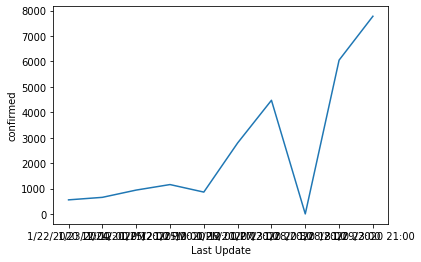

In [12]:
sns.lineplot(data=to_plot, x='Last Update', y="confirmed")

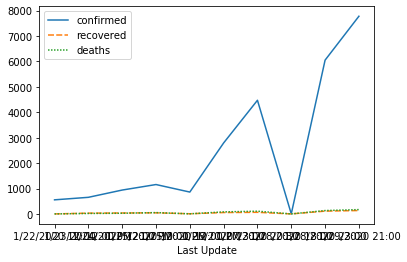

In [13]:
line_plot = to_plot.set_index('Last Update')

sns.lineplot(data=line_plot)

In [14]:
line_plot

,confirmed,recovered,deaths
Last Update,,,
1/22/2020 12:00,554.0,0.0,0.0
1/23/20 12:00 PM,653.0,30.0,18.0
1/24/2020 12:00 PM,939.0,36.0,26.0
1/25/2020 10:00 PM,1156.0,43.0,52.0
1/25/2020 12:00 PM,860.0,6.0,4.0
1/26/2020 23:00,2793.0,54.0,80.0
1/27/2020 20:30,4472.0,63.0,107.0
1/28/2020 23:00,6052.0,110.0,132.0
1/28/2020 18:00,1.0,0.0,0.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

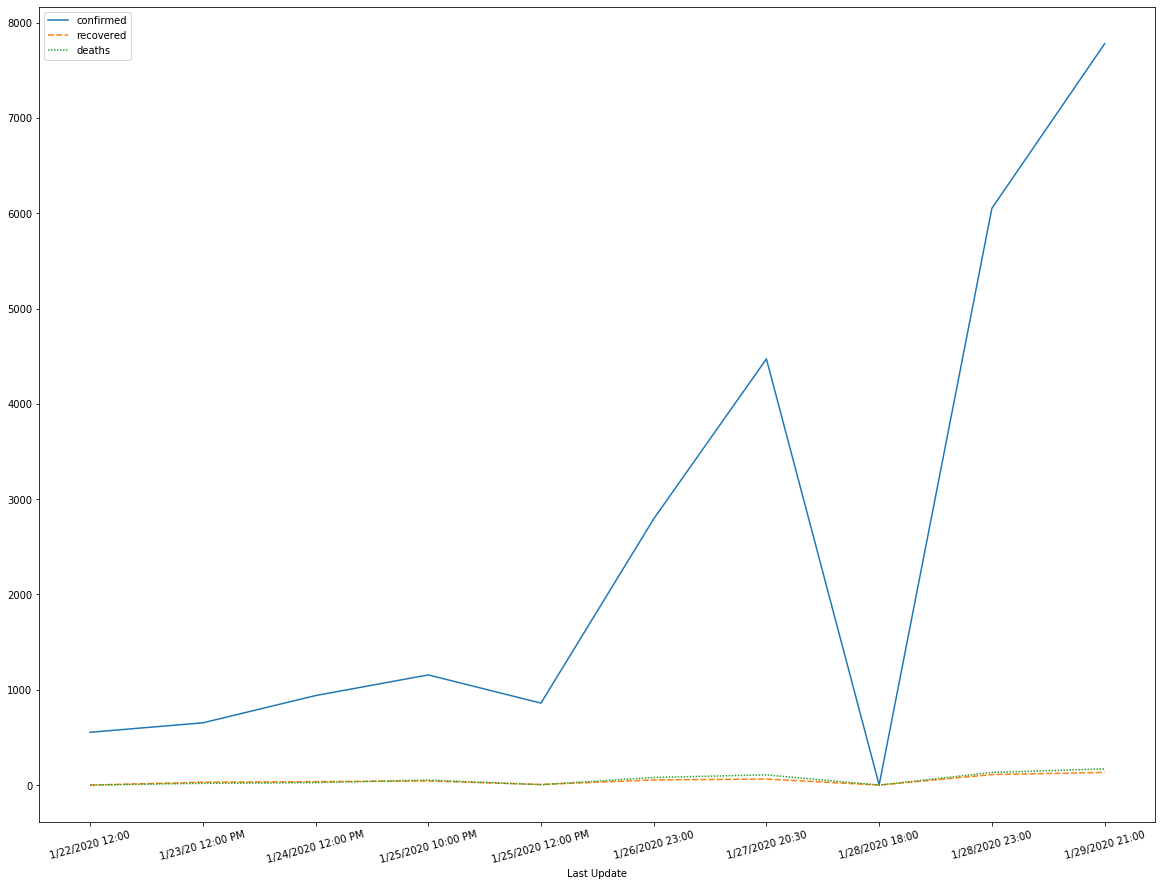

In [15]:
# other configuration: rotate the xtick labels, set the figure size

import matplotlib.pyplot as plt 

plt.figure(figsize=(20,15))
sns.lineplot(data=line_plot)
plt.xticks(rotation=15)

### Does the confirmed number decrease? Why there are two drops in the chart?